# Q6

Import some prerequisites:

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Run this cell for plotting.

In [2]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

Here is for your helper functions(optional).

Implement this function to get the input image and return the skeleton of the input image.

In [104]:
def dilate(img, kernel): 
    '''
    Dialates image with given kernel.

    Parameters:
        img (np.ndarray): The image to dialate.
        kernel (np.ndarray): The kernel to dialate image with.

    Returns:
        np.ndarray: The dialated image.
    '''
    #Write your code here

    img_dialated = np.zeros(img.shape)
    x = img.shape[0]
    y = img.shape[1]
    #make a padding 
    img = np.pad(img, ((1, 1), (1, 1)), mode='constant')
    

    for i in range(x):
      for j in range(y):
        # find out if there is a 1 in the image if not put 0 in result
        hold = img[i : i + kernel.shape[0] , j : j + kernel.shape[1]] * kernel
        img_dialated[i , j] = np.max(hold)

    return img_dialated

Test implementation

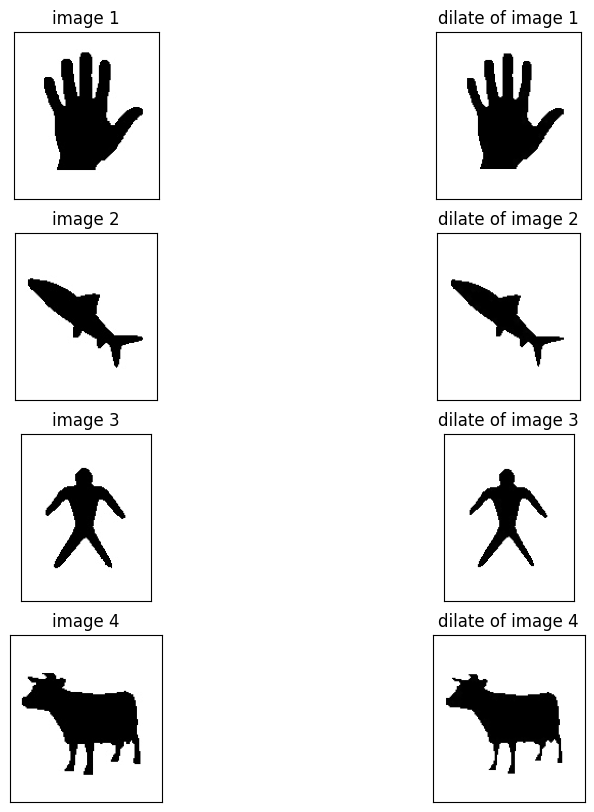

In [105]:
image_list = []

image1 = cv2.imread('./images/img1.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_dilate = dilate(image1, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image1_dilate, 'dilate of image 1','img'])

image2 = cv2.imread('./images/img2.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_dilate= dilate(image2, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image2_dilate, 'dilate of image 2','img'])

image3 = cv2.imread('./images/img3.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_dilate = dilate(image3, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image3_dilate, 'dilate of image 3', 'img'])

image4 = cv2.imread('./images/img4.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_dilate = dilate(image4, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image4_dilate, 'dilate of image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q6-a-dilate')

In [75]:
def erode(img, kernel): 
    '''
    Erodes image with given kernel.

    Parameters:
        img (np.ndarray): The image to erode.
        kernel (np.ndarray): The kernel to erode image with.

    Returns:
        np.ndarray: The eroded image.
    '''
    img_eroded = np.zeros(img.shape)
    
    #Write your code here
    x = img.shape[0]
    y = img.shape[1]
    #print(x , y)
    img = np.pad(img, ((1, 1), (1, 1)), mode='constant', constant_values=1)
    #print(img.shape)
    for i in range(x):
      for j in range(y):
        #print(kernel.shape[0])
        hold = img[i : i + kernel.shape[0] , j : j + kernel.shape[1]] * kernel
        nmd = []
        #find if there is 0 in a place that kernel has 1 in it
        for p in range(kernel.shape[0]):
          for t in range(kernel.shape[1]):
            if kernel[p , t] == 1:
              nmd.append(img[p + i , t + j])
        img_eroded[i , j] = np.min(nmd)

    
    return img_eroded

Test your implementation

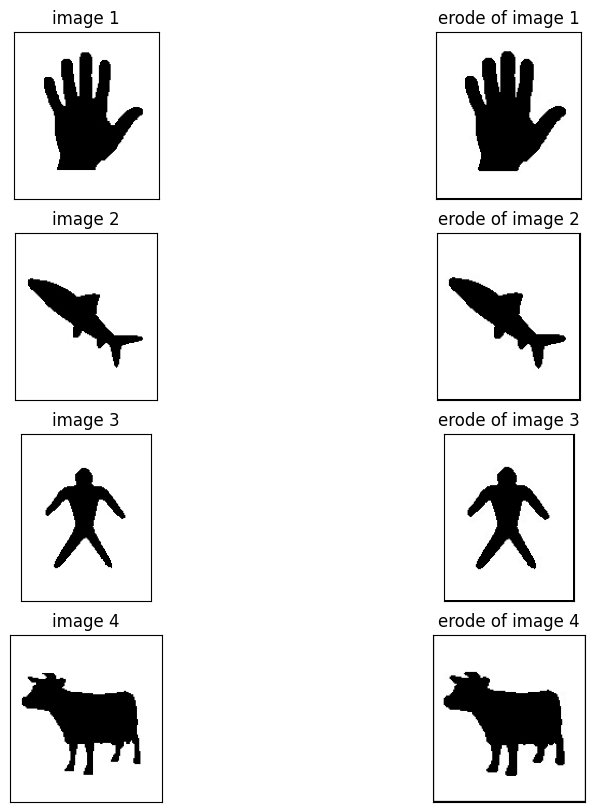

In [76]:
image_list = []

image1 = cv2.imread('./images/img1.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_erode = erode(image1, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image1_erode, 'erode of image 1','img'])

image2 = cv2.imread('./images/img2.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_erode= erode(image2, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image2_erode, 'erode of image 2','img'])

image3 = cv2.imread('./images/img3.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_erode = erode(image3, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image3_erode, 'erode of image 3', 'img'])

image4 = cv2.imread('./images/img4.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_erode = erode(image4, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image4_erode, 'erode of image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q6-a-erode')

In [106]:
def open_morphology(img, kernel): 
    '''
    Performs opening morphology operation on the image.

    Parameters:
        img (numpy.ndarray): The image to perform opening morphology operation on.

    Returns:
        numpy.ndarray: The result image.
    '''

    #Write your code here
    img_opened = erode(img , kernel)
    img_opened = dilate(img_opened , kernel)
    return img_opened

Test your implementatino

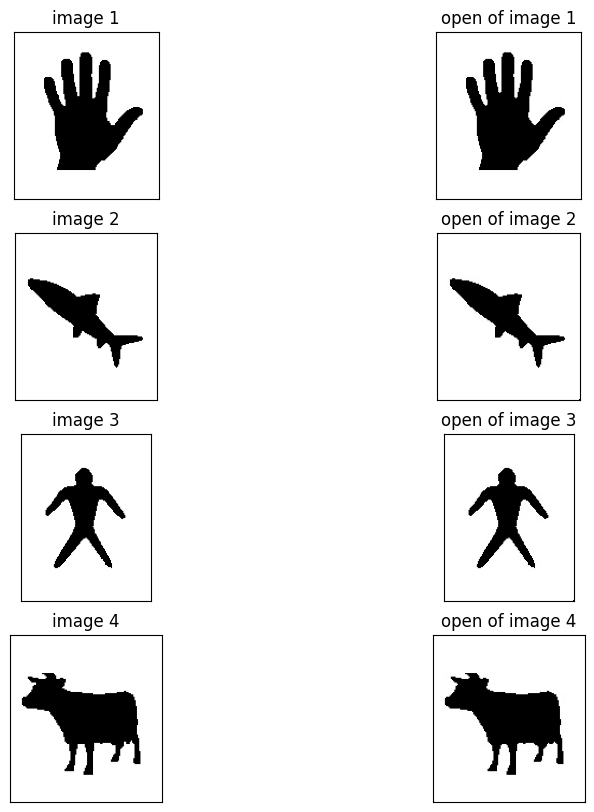

In [107]:
image_list = []

image1 = cv2.imread('./images/img1.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_open = open_morphology(image1, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image1_open, 'open of image 1','img'])

image2 = cv2.imread('./images/img2.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_open= open_morphology(image2, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image2_open, 'open of image 2','img'])

image3 = cv2.imread('./images/img3.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_open = open_morphology(image3, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image3_open, 'open of image 3', 'img'])

image4 = cv2.imread('./images/img4.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_open = open_morphology(image4, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image4_open, 'open of image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q6-a-open')

In [108]:
def close_morphology(img, kernel): 
    '''
    Performs closing morphology operation on the image.

    Parameters:
        img (numpy.ndarray): The image to perform closing morphology operation on.

    Returns:
        numpy.ndarray: The result image.
    '''

    #Write your code here
    img_closed = dilate(img , kernel)
    img_closed = erode(img_closed , kernel)
    
    return img_closed

Test your implemention

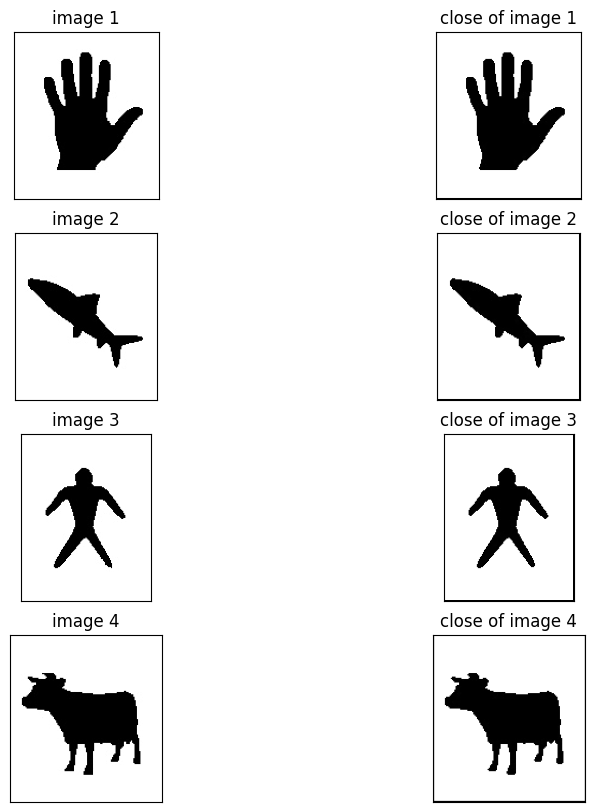

In [109]:
image_list = []

image1 = cv2.imread('./images/img1.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_close = close_morphology(image1, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image1_close, 'close of image 1','img'])

image2 = cv2.imread('./images/img2.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_close= close_morphology(image2, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image2_close, 'close of image 2','img'])

image3 = cv2.imread('./images/img3.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_close = close_morphology(image3, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image3_close, 'close of image 3', 'img'])

image4 = cv2.imread('./images/img4.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_close = close_morphology(image4, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image4_close, 'close of image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q6-a-close')

# Part 2

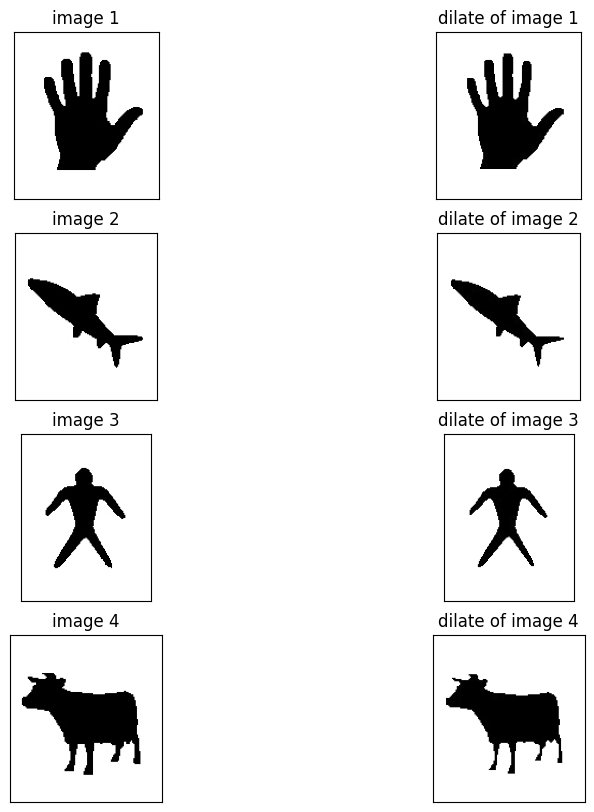

In [28]:
#Write your code here
#Like last part, you should make output of each operation separately. Name output image files like this format: Q6-b-dilate, Q6-b-erode
kernel = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]] , dtype = np.uint8)

image_list = []

image1 = cv2.imread('./images/img1.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_dilate = cv2.dilate(image1 , kernel , iterations = 1)
image_list.append([image1_dilate, 'dilate of image 1','img'])

image2 = cv2.imread('./images/img2.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_dilate= cv2.dilate(image2 , kernel , iterations = 1)
image_list.append([image2_dilate, 'dilate of image 2','img'])

image3 = cv2.imread('./images/img3.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_dilate = cv2.dilate(image3 , kernel , iterations = 1)
image_list.append([image3_dilate, 'dilate of image 3', 'img'])

image4 = cv2.imread('./images/img4.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_dilate = cv2.dilate(image4 , kernel , iterations = 1)
image_list.append([image4_dilate, 'dilate of image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q6-b-dilate')

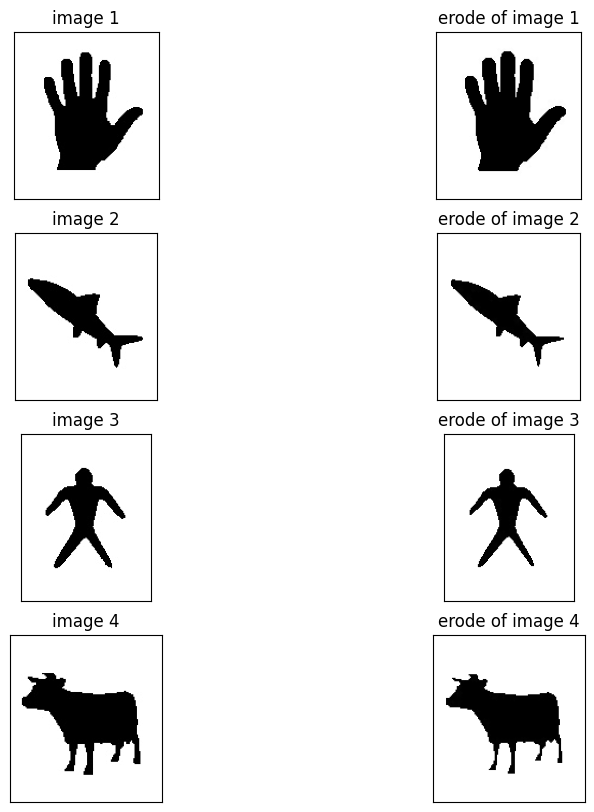

In [29]:
kernel = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]] , dtype = np.uint8)
image_list = []

image1 = cv2.imread('./images/img1.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_erode = cv2.erode(image1 , kernel , iterations = 1)
image_list.append([image1_erode, 'erode of image 1','img'])

image2 = cv2.imread('./images/img2.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_erode= cv2.dilate(image2 , kernel , iterations = 1)
image_list.append([image2_erode, 'erode of image 2','img'])

image3 = cv2.imread('./images/img3.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_erode = cv2.dilate(image3 , kernel , iterations = 1)
image_list.append([image3_erode, 'erode of image 3', 'img'])

image4 = cv2.imread('./images/img4.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_erode = cv2.dilate(image4 , kernel , iterations = 1)
image_list.append([image4_erode, 'erode of image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q6-b-erode')

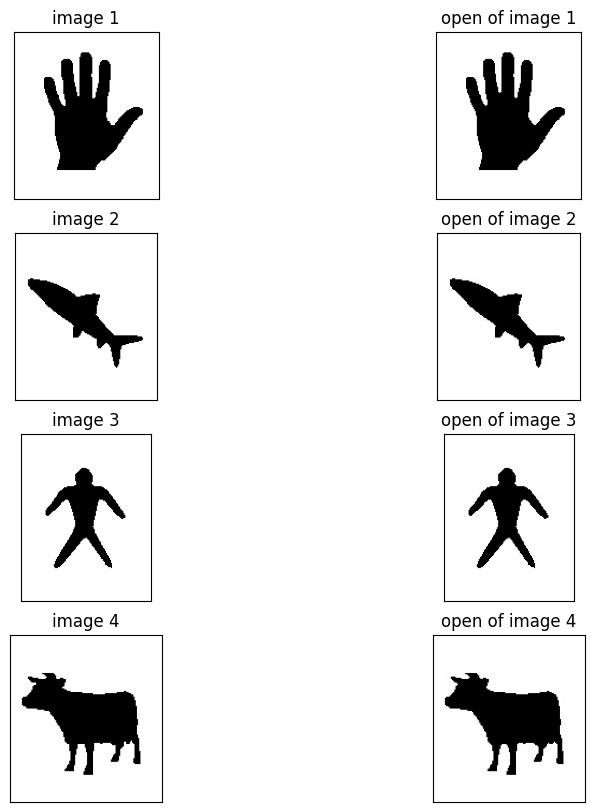

In [30]:
kernel = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]] , dtype = np.uint8)
image_list = []

image1 = cv2.imread('./images/img1.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_open = cv2.morphologyEx(image1 , cv2.MORPH_OPEN , kernel)
image_list.append([image1_open, 'open of image 1','img'])

image2 = cv2.imread('./images/img2.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_open= cv2.morphologyEx(image2 , cv2.MORPH_OPEN , kernel)
image_list.append([image2_open, 'open of image 2','img'])

image3 = cv2.imread('./images/img3.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_open = cv2.morphologyEx(image3 , cv2.MORPH_OPEN , kernel)
image_list.append([image3_open, 'open of image 3', 'img'])

image4 = cv2.imread('./images/img4.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_open = cv2.morphologyEx(image4 , cv2.MORPH_OPEN , kernel)
image_list.append([image4_open, 'open of image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q6-b-open')

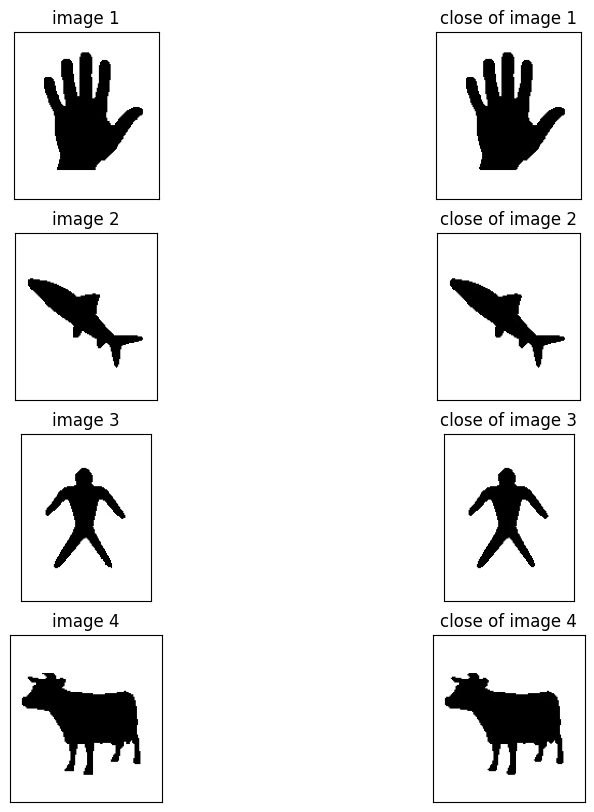

In [33]:
kernel = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]] , dtype = np.uint8)
image_list = []

image1 = cv2.imread('./images/img1.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_close = cv2.morphologyEx(image1 , cv2.MORPH_CLOSE , kernel)
image_list.append([image1_close, 'close of image 1','img'])

image2 = cv2.imread('./images/img2.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_close= cv2.morphologyEx(image2 , cv2.MORPH_CLOSE , kernel)
image_list.append([image2_close, 'close of image 2','img'])

image3 = cv2.imread('./images/img3.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_close = cv2.morphologyEx(image3 , cv2.MORPH_CLOSE , kernel)
image_list.append([image3_close, 'close of image 3', 'img'])

image4 = cv2.imread('./images/img4.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_close = cv2.morphologyEx(image4 , cv2.MORPH_CLOSE , kernel)
image_list.append([image4_close, 'close of image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q6-b-close')

# Part 3: optional
Skeleton of image

In [102]:
def get_skeleton(image , kernel):
    """
    Finds the skeleton of the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The skeleton image.  
    """
    
    """res = image.copy()
    
    #Write your code here
    treshhold = 120
    kernel = kernel.astype(np.uint8)
    _ , thresholded  = cv2.threshold(image ,treshhold ,255,cv2.THRESH_BINARY) 
    size = np.size(kernel)
    skel = np.zeros(thresholded.shape, np.uint8)
    element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
    
    while(True):
      eroded = cv2.erode(thresholded, element)

      # Opening
      temp = cv2.dilate(eroded, element)
      temp = cv2.subtract(thresholded, temp)
      skel = cv2.bitwise_or(skel, temp)
      thresholded = eroded.copy()
        
      # Check if there are no white pixels left
      if cv2.countNonZero(thresholded) == 0:
          break
    res = erode"""

    
    return res

Test your implementation (don't change this cell).

TypeError: ignored

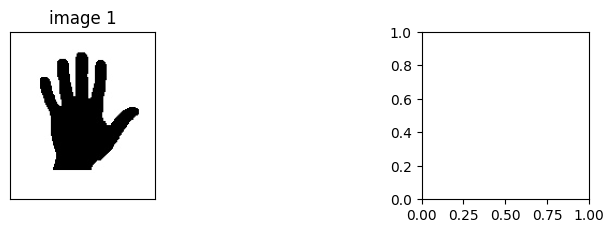

In [103]:
image_list = []

image1 = cv2.imread('./images/img1.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_skeleton = get_skeleton(image1, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image1_skeleton, 'skeleton of image 1','img'])

image2 = cv2.imread('./images/img2.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_skeleton= get_skeleton(image2, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image2_skeleton, 'skeleton of image 2','img'])

image3 = cv2.imread('./images/img3.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_skeleton = get_skeleton(image3, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image3_skeleton, 'skeleton of image 3', 'img'])

image4 = cv2.imread('./images/img4.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_skeleton = get_skeleton(image4, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image4_skeleton, 'skeleton of image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q6-c')

End!!!